In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats

# Part 1 - Two sample t-test

In [2]:
def t_test(s1: tuple, s2: tuple) -> tuple:
    """Welch's two-sample t-Test.
    
    Return the values of the 't' statistic and degrees of freedom 'v'.
    """
    # sample mean estimate, sample variance estimate and sample size
    mean1, var1, n1 = s1  
    mean2, var2, n2 = s2
    # degrees of freedom of the variance estimate
    v1 = n1 - 1
    v2 = n2 - 1 
    t = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))
    v = (var1 / n1 + var2 / n2)**2 / (var1**2 / (n1**2 * v1) + (var2**2 / (n2**2 * v2)))
    return t, v


sample1 = (0.299, 0.05, 150)
sample2 = (0.307, 0.08, 165)

t, v = t_test(sample1, sample2)
print("t = {:.3f}, v = {:.3f}".format(t, v))

t = -0.280, v = 307.199


### `scipy.stats.ttest_ind()`

```python
Signature: scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int or None, optional
    Axis along which to compute test. If None, compute over the whole
    arrays, `a`, and `b`.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
    population variance [2]_.

    .. versionadded:: 0.11.0
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is 'propagate'):

      * 'propagate': returns nan
      * 'raise': throws an error
      * 'omit': performs the calculations ignoring nan values

Returns
-------
statistic : float or array
    The calculated t-statistic.
pvalue : float or array
    The two-tailed p-value.

Notes
-----
We can use this test, if we observe two independent samples from
the same or different population, e.g. exam scores of boys and
girls or of two ethnic groups. The test measures whether the
average (expected) value differs significantly across samples. If
we observe a large p-value, for example larger than 0.05 or 0.1,
then we cannot reject the null hypothesis of identical average scores.
If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,
then we reject the null hypothesis of equal averages.

```

In [3]:
filename = "../data/baseball_stats.csv"
baseball = pd.read_csv(filename)

In [4]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18177 entries, 0 to 18176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        18177 non-null  object 
 1   handedness  16974 non-null  object 
 2   height      18177 non-null  object 
 3   weight      18177 non-null  object 
 4   avg         18177 non-null  float64
 5   HR          18177 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 852.2+ KB


In [5]:
baseball.head(10)

,name,handedness,height,weight,avg,HR
0,Brandon Hyde,R,75,210,0.000,0
1,Carey Selph,R,69,175,0.277,0
2,Philip Nastu,L,74,180,0.040,0
3,Kent Hrbek,L,76,200,0.282,293
4,Bill Risley,R,74,215,0.000,0
5,Wood,NaN,,,0.000,0
6,Steve Gajkowski,R,74,200,0.000,0
7,Rick Schu,R,72,170,0.246,41
8,Tom Brown,R,73,170,0.000,0
9,Tom Browning,L,73,190,0.153,2


In [6]:
def compare_averages(filename):
    """
    Performs Welch's t-test on two sets of baseball data (left-handed and right-handed hitters).

    With a significance level of 95%, if there is no difference between the two cohorts, return a tuple consisting of
    True, and then the tuple returned by scipy.stats.ttest.  
    
    If there is a difference, return a tuple consisting of False, and then the tuple returned by scipy.stats.ttest.
    
    For example, the tuple returned may look like: (True, (9.93570222, 0.000023))
    """
    baseball = pd.read_csv(filename)
    left_handed = baseball[baseball.handedness == 'L']['avg']
    right_handed = baseball[baseball.handedness == 'R']['avg']
    t, p = scipy.stats.ttest_ind(left_handed, right_handed, equal_var=False)
    return (False, (t, p)) if p < 0.05 else (True, (t, p))
    

compare_averages(filename)


(False, (9.935702226242094, 3.810274225888738e-23))

# Part 2 - Shapiro-Wilk test for normality

### `scipy.stats.shapiro()`

```python
Signature: scipy.stats.shapiro(x)
Docstring:
Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the
data was drawn from a normal distribution.

Parameters
----------
x : array_like
    Array of sample data.

Returns
-------
statistic : float
    The test statistic.
p-value : float
    The p-value for the hypothesis test.

See Also
--------
anderson : The Anderson-Darling test for normality
kstest : The Kolmogorov-Smirnov test for goodness of fit.

Notes
-----
The algorithm used is described in [4]_ but censoring parameters as
described are not implemented. For N > 5000 the W test statistic is accurate
but the p-value may not be.

The chance of rejecting the null hypothesis when it is true is close to 5%
regardless of sample size.

```

### Check the baseball dataset for normality of the distribution of *avg*

In [7]:
averages = baseball['avg'][baseball.avg > 0.00]

statistic, p = scipy.stats.shapiro(averages[: 5000])

print("statistic = {:.3f}, p-value = {:.3f}".format(statistic, p))

print("Conclusion: The batting averages are not normally distributed, since p is \
close to 0 and way lower than the usual 0.05")

statistic = 0.750, p-value = 0.000
Conclusion: The batting averages are not normally distributed, since p is close to 0 and way lower than the usual 0.05


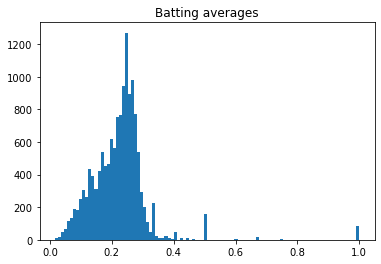

In [8]:
plt.hist(averages, bins=100)
plt.title("Batting averages")
plt.show()

# Part 3 - Mann-Whitney U Test

### `scipy.stats.mannwhitneyu()`

```python
Signature: scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)
Docstring:
Compute the Mann-Whitney rank test on samples x and y.

Parameters
----------
x, y : array_like
    Array of samples, should be one-dimensional.
use_continuity : bool, optional
        Whether a continuity correction (1/2.) should be taken into
        account. Default is True.
alternative : {None, 'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis.
    The following options are available (default is None):

      * None: computes p-value half the size of the 'two-sided' p-value and
        a different U statistic. The default behavior is not the same as
        using 'less' or 'greater'; it only exists for backward compatibility
        and is deprecated.
      * 'two-sided'
      * 'less': one-sided
      * 'greater': one-sided

    Use of the None option is deprecated.

Returns
-------
statistic : float
    The Mann-Whitney U statistic, equal to min(U for x, U for y) if
    `alternative` is equal to None (deprecated; exists for backward
    compatibility), and U for y otherwise.
pvalue : float
    p-value assuming an asymptotic normal distribution. One-sided or
    two-sided, depending on the choice of `alternative`.

Notes
-----
Use only when the number of observation in each sample is > 20 and
you have 2 independent samples of ranks. Mann-Whitney U is
significant if the u-obtained is LESS THAN or equal to the critical
value of U.

This test corrects for ties and by default uses a continuity correction.
```

### For the baseball dataset, test the following for the batting averages:

- If we draw randomly from each distribution of batting averages for left-handed and right-handed players, one distribution is more likely to generate a higher value than the other.

In [9]:
left_handed = baseball[(baseball.handedness == 'L') & (baseball.avg > 0.0)]['avg']
right_handed = baseball[(baseball.handedness == 'R') & (baseball.avg > 0.0)]['avg']

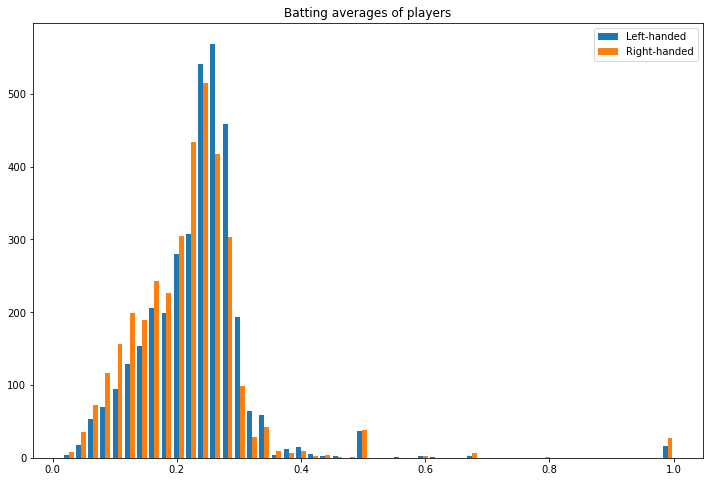

In [10]:
plt.figure(figsize=(12, 8))
plt.hist([left_handed[:3500], right_handed[:3500]], bins=50, label=["Left-handed", "Right-handed"])
plt.title("Batting averages of players")
plt.legend()
plt.show()

In [11]:
statistic, p = scipy.stats.mannwhitneyu(left_handed, right_handed, alternative='less')

print("LEFT HANDED PLAYERS\n", left_handed.describe(), "\n")
print("RIGHT HANDED PLAYERS\n", right_handed.describe(), "\n")

print("Null-hypothesis: Left-handed players' batting average median value is greater than right-handed players'")
print("statistic = {:.3f}, p-value = {:.3f}".format(statistic, p))

print("\nConclusion: If we randomly select a left-handed and a right-handed player, \
the left-handed player is more likely to have a higher batting average.")

LEFT HANDED PLAYERS
 count    3724.000000
mean        0.233777
std         0.088795
min         0.016000
25%         0.188750
50%         0.243000
75%         0.271000
max         1.000000
Name: avg, dtype: float64 

RIGHT HANDED PLAYERS
 count    8391.000000
mean        0.217780
std         0.101292
min         0.021000
25%         0.163000
50%         0.222000
75%         0.258000
max         1.000000
Name: avg, dtype: float64 

Null-hypothesis: Left-handed players' batting average median value is greater than right-handed players'
statistic = 18224517.500, p-value = 1.000

Conclusion: If we randomly select a left-handed and a right-handed player, the left-handed player is more likely to have a higher batting average.


# Part 4 - Linear Regression

In [ ]:
def compute_cost(features, values, theta):
    """
    Compute the cost of a list of parameters, theta, given a list of features 
    (input data points) and values (output data points).
    """
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2 * m)
    return cost


def gradient_descent(features, values, theta, alpha, num_iterations):
    """Perform gradient descent given a data set with an arbitrary number of features.
    
    The code performs 'num_iterations' updates to the elements of theta.
    Every time we compute the cost for a given list of thetas, we append it to the cost_history.    
    """
    cost_history = []
    m = len(values)
    for _ in range(num_iterations):
        theta -= (alpha / m) * np.dot(np.transpose(features), np.dot(features, theta) - values)
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    
    return theta, pd.Series(cost_history)


# Part 5 - Coefficient of determination

### Definition
In statistics, the coefficient of determination, denoted R<sup>2</sup> or r<sup>2</sup> and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed 
outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

In [ ]:
def compute_r_squared(data, predictions):
    """Given two input numpy arrays, 'data', and 'predictions', return the coefficient of 
    determination, R^2, for the model that produced the predictions.
    """
    return 1 - np.square(data - predictions).sum() / np.square(data - data.mean()).sum()